# 1. 평균 Daily Active User 를 구해서 avg_active_user라는 변수에 저장하시오. (20점)

제약사항

위의 user_data 의 기간 전체를 사용합니다
단, 유저가 방문하지 않은 날짜는 제외(무시)하고, DAU 를 구하시오
avg_active_user 은 DataFrame이 아닌 숫자(float)로 저장되어야 합니다.

In [1]:
# 아래 과제가 돌아가기 위해 필요한 모든 패키지를 불러옵니다

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 수정 금지) 아래는 예제 데이터를 불러오는 코드입니다.

# user_data 에 대한 설명은 다음과 같습니다.
# user_id: 유저별 unique ID
# session_id: 유저의 세션 ID
# date: event 발생 날짜
  
  # 수정 금지: 데이터셋 준비 #
a = (1051,1051,1051,1051,1051,2073,2073,2073,2073,3063,3063,3063,3053,3024,3024)
b = ('aBxD','aBxD','aBxD','aBxD','aBxD','bDbD','bDbD','bDbC','bDbC','aaaa','aaab','aaac', '5DaD','aDDD','aDDE')
c = ('2021-10-31','2021-10-31','2021-10-31','2021-11-01','2021-11-01','2021-10-31','2021-10-31','2021-10-30', '2021-10-29','2021-11-07','2021-11-08','2021-11-09','2021-11-09','2021-11-09','2021-11-10')
user_data = pd.DataFrame({"user_id":a, "session_id":b, "date": c})

In [2]:
user_data.head()

,user_id,session_id,date
0,1051,aBxD,2021-10-31
1,1051,aBxD,2021-10-31
2,1051,aBxD,2021-10-31
3,1051,aBxD,2021-11-01
4,1051,aBxD,2021-11-01


In [3]:
# 날짜 별 unique user 수 계산하기
df_dau = user_data.groupby('date')['user_id'].nunique()

In [4]:
df_dau.head()

date
2021-10-29    1
2021-10-30    1
2021-10-31    2
2021-11-01    1
2021-11-07    1
Name: user_id, dtype: int64

In [5]:
avg_active_user = df_dau.values.astype('float')
avg_active_user

array([1., 1., 2., 1., 1., 1., 3., 1.])

In [6]:
avg_active_user.dtype

dtype('float64')

# 2. 11월 데이터만 필터링하여 november_data 변수에 dataframe 형태로 저장합니다

11월 한 달 동안의 DAU/MAU 지표를 구하시오 (총 30점, 4문제)

user_data 를 사용합니다
단, 유저가 방문하지 않은 날짜는 제외(무시)하고, DAU 를 구하시오

In [7]:
user_data['date_dtm_format'] = pd.to_datetime(user_data['date'], format='%Y-%m-%d')

In [8]:
user_data.head()

,user_id,session_id,date,date_dtm_format
0,1051,aBxD,2021-10-31,2021-10-31
1,1051,aBxD,2021-10-31,2021-10-31
2,1051,aBxD,2021-10-31,2021-10-31
3,1051,aBxD,2021-11-01,2021-11-01
4,1051,aBxD,2021-11-01,2021-11-01


In [9]:
user_data['year_month'] = user_data['date_dtm_format'].dt.strftime('%Y-%m')

In [10]:
user_data.head()

,user_id,session_id,date,date_dtm_format,year_month
0,1051,aBxD,2021-10-31,2021-10-31,2021-10
1,1051,aBxD,2021-10-31,2021-10-31,2021-10
2,1051,aBxD,2021-10-31,2021-10-31,2021-10
3,1051,aBxD,2021-11-01,2021-11-01,2021-11
4,1051,aBxD,2021-11-01,2021-11-01,2021-11


In [11]:
november_data = user_data[user_data['year_month'] == '2021-11']

In [12]:
november_data

,user_id,session_id,date,date_dtm_format,year_month
3,1051,aBxD,2021-11-01,2021-11-01,2021-11
4,1051,aBxD,2021-11-01,2021-11-01,2021-11
9,3063,aaaa,2021-11-07,2021-11-07,2021-11
10,3063,aaab,2021-11-08,2021-11-08,2021-11
11,3063,aaac,2021-11-09,2021-11-09,2021-11
12,3053,5DaD,2021-11-09,2021-11-09,2021-11
13,3024,aDDD,2021-11-09,2021-11-09,2021-11
14,3024,aDDE,2021-11-10,2021-11-10,2021-11


# 3. november_data를 이용하여, 11월 DAU를 구한 후 dau_11 변수에 저장합니다.

In [13]:
dau = november_data.groupby('date')['user_id'].nunique()
dau_11 = dau.values.astype('float')

In [14]:
dau_11

array([1., 1., 1., 3., 1.])

# 4. november_data를 이용하여, 11월 MAU를 구한 후 mau_11 변수에 저장합니다.

In [15]:
mau = november_data.groupby('year_month')['user_id'].nunique()
mau_11  = mau.values.astype('float')

In [16]:
mau_11

array([4.])

# 5. 앞에서 구한 지표를 바탕으로 11월 1달 DAU/MAU 를 구하여 dau_mau_11 변수에 저장합니다.

In [17]:
avg_daily_user = dau_11.mean()
avg_monthly_user = mau_11.mean()
dau_mau_11 = avg_daily_user / avg_monthly_user

In [18]:
dau_mau_11

0.35

In [19]:
print('11월 한 달 동안의 DAU/MAU 지표 %2.2f' % (dau_mau_11 * 100) + '%')

11월 한 달 동안의 DAU/MAU 지표 35.00%


# 6. 다음 데이터를 가지고 코호트 분석을 위한 히트맵 그래프를 만들어 주세요 (50점)

아래 제약 사항을 잘 읽어 주세요.<br>

기간: 2021-01 ~ 2021-05월<br>
분석 목적: 해당 기간 동안 기간 별 재방문율 변화를 파악합니다.<br>
그래프 크기: 그래프 크기는 (9, 7) 입니다.<br>
그래프 내 값은 백분율로 %를 포함하여 소숫점 2자리까지 그려주세요.<br>
첫 방문월도 포함하여 그래프를 그려주세요.<br>
그래프는 다음과 같습니다.<br>
cohort_data 에 대한 컬럼 설명 안내<br>

first_visit_month : 유저의 첫 방문월<br>
revisit_month: 재방문월<br>
user_cnt: 각 첫 방문월/재방문월 별 유저수<br>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
## 수정 금지) 데이터셋 준비 ## 
a = ('2021-01','2021-01','2021-01','2021-01','2021-01','2021-02', '2021-02','2021-02','2021-02','2021-03','2021-03','2021-03','2021-04','2021-04','2021-05')
b = ('2021-01','2021-02','2021-03','2021-04','2021-05','2021-02', '2021-03','2021-04','2021-05','2021-03','2021-04','2021-05','2021-04','2021-05','2021-05')
c = (100,80,60,40,10,96, 55,33,11,90,20,10,120,5,1)
cohort_data = pd.DataFrame({"first_visit_month":a, "revisit_month":b, "user_cnt": c})

In [22]:
cohort_data

,first_visit_month,revisit_month,user_cnt
0,2021-01,2021-01,100
1,2021-01,2021-02,80
2,2021-01,2021-03,60
3,2021-01,2021-04,40
4,2021-01,2021-05,10
5,2021-02,2021-02,96
6,2021-02,2021-03,55
7,2021-02,2021-04,33
8,2021-02,2021-05,11
9,2021-03,2021-03,90


In [23]:
cohort = cohort_data.copy(True)

In [24]:
cohort.first_visit_month.value_counts().sort_index()

2021-01    5
2021-02    4
2021-03    3
2021-04    2
2021-05    1
Name: first_visit_month, dtype: int64

In [25]:
cohort['first_visit_month_dt'] = pd.to_datetime(cohort_data.first_visit_month, format='%Y-%m')
cohort['revisit_month_dt'] = pd.to_datetime(cohort_data.revisit_month, format='%Y-%m')
cohort['month_diff'] = cohort.revisit_month_dt.dt.to_period('M').astype(int) - cohort.first_visit_month_dt.dt.to_period('M').astype(int)

In [26]:
cohort

,first_visit_month,revisit_month,user_cnt,first_visit_month_dt,revisit_month_dt,month_diff
0,2021-01,2021-01,100,2021-01-01,2021-01-01,0
1,2021-01,2021-02,80,2021-01-01,2021-02-01,1
2,2021-01,2021-03,60,2021-01-01,2021-03-01,2
3,2021-01,2021-04,40,2021-01-01,2021-04-01,3
4,2021-01,2021-05,10,2021-01-01,2021-05-01,4
5,2021-02,2021-02,96,2021-02-01,2021-02-01,0
6,2021-02,2021-03,55,2021-02-01,2021-03-01,1
7,2021-02,2021-04,33,2021-02-01,2021-04-01,2
8,2021-02,2021-05,11,2021-02-01,2021-05-01,3
9,2021-03,2021-03,90,2021-03-01,2021-03-01,0


In [27]:
cohort = cohort[['first_visit_month', 'month_diff', 'user_cnt']]
cohort.set_index(['first_visit_month', 'month_diff'], inplace=True)
cohort

user_cnt
first_visit_month month_diff          
2021-01           0                100
                  1                 80
                  2                 60
                  3                 40
                  4                 10
2021-02           0                 96
                  1                 55
                  2                 33
                  3                 11
2021-03           0                 90
                  1                 20
                  2                 10
2021-04           0                120
                  1                  5
2021-05           0                  1

In [28]:
cohort = cohort['user_cnt'].unstack(1)
cohort

month_diff,0,1,2,3,4
first_visit_month,,,,,
2021-01,100.0,80.0,60.0,40.0,10.0
2021-02,96.0,55.0,33.0,11.0,NaN
2021-03,90.0,20.0,10.0,NaN,NaN
2021-04,120.0,5.0,NaN,NaN,NaN
2021-05,1.0,NaN,NaN,NaN,NaN


In [29]:
revisit_rate = cohort.divide(cohort[0], axis=0)
revisit_rate

month_diff,0,1,2,3,4
first_visit_month,,,,,
2021-01,1.0,0.800000,0.600000,0.400000,0.1
2021-02,1.0,0.572917,0.343750,0.114583,NaN
2021-03,1.0,0.222222,0.111111,NaN,NaN
2021-04,1.0,0.041667,NaN,NaN,NaN
2021-05,1.0,NaN,NaN,NaN,NaN


Text(29.5, 0.5, '첫 방문월')

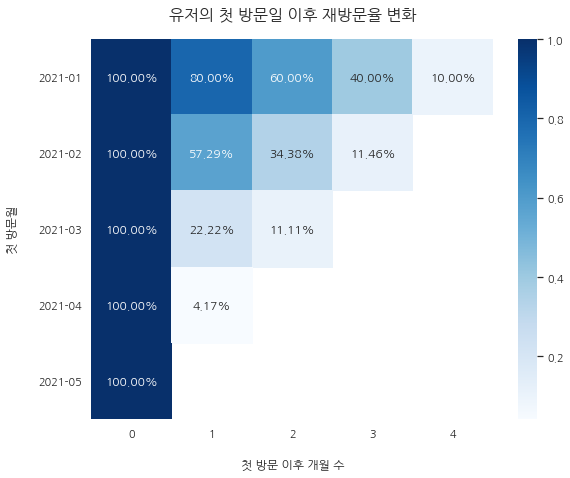

In [30]:
sns.set_theme(style='whitegrid', palette='pastel')
plt.rc('font', family='NanumGothic')

g = sns.heatmap(revisit_rate, annot=True, fmt='.2%', cmap='Blues')
g.figure.set_size_inches(9, 7)
g.set_title('유저의 첫 방문일 이후 재방문율 변화', pad=20, size=16)
g.set_xlabel('첫 방문 이후 개월 수', labelpad=20, size=12)
g.set_ylabel('첫 방문월', labelpad=20, size=12)